# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started 

Import the file `'turnstile_180901.txt'`. 

In [118]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [120]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [121]:
# Rename all the columns to lower case
df.columns.str.lower()

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

In [122]:
# Now let's check and make sure that worked
df.columns= df.columns.str.lower()
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [123]:
# Change the index to 'linename'
df.set_index('linename' , inplace= True)

Reset the index: 

In [124]:
# Reset the index
df.reset_index('linename' ,inplace= True)

In [125]:
df

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
...,...,...,...,...,...,...,...,...,...,...,...
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [126]:
# Add a new 'num_lines' column
#use map intstead of the forloop to iterate thro' the condition
#the conditions are counting how many lines pass thro' a station: LEN()
# to check the unique count of thelines: SET()
results = df['linename'].map(lambda x : (len(set(x))))
#  
df['Num_lines'] = results
# Sort the DataFrame by 'Num_Lines' in descending order
df.sort_values(by='Num_lines', ascending=False, inplace=True)


Write a function to clean column names: 

In [127]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_lines'],
      dtype='object')

In [128]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = df.columns.map(lambda col: col.lower())   
    return cleaned

In [129]:
# Use the above function to clean the column names
df.columns = clean('Num_lines')

In [130]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [131]:
# just checking the data tpye of the date
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197625 entries, 132292 to 197624
Data columns (total 12 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   linename                                                              197625 non-null  object
 1   c/a                                                                   197625 non-null  object
 2   unit                                                                  197625 non-null  object
 3   scp                                                                   197625 non-null  object
 4   station                                                               197625 non-null  object
 5   division                                                              197625 non-null  object
 6   date                                                                  197625 non-null  objec

In [132]:

# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])
df['date']

132292   2018-08-30
2686     2018-08-29
2673     2018-08-27
2674     2018-08-27
2675     2018-08-28
            ...    
112565   2018-08-27
112564   2018-08-27
112563   2018-08-27
112562   2018-08-26
197624   2018-08-31
Name: date, Length: 197625, dtype: datetime64[ns]

In [133]:
# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_the_week'] = df['date'].dt.day_name()
df['day_of_the_week']

132292     Thursday
2686      Wednesday
2673         Monday
2674         Monday
2675        Tuesday
            ...    
112565       Monday
112564       Monday
112563       Monday
112562       Sunday
197624       Friday
Name: day_of_the_week, Length: 197625, dtype: object

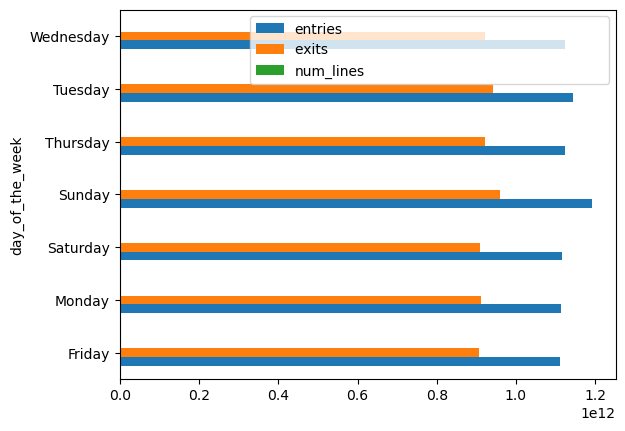

In [134]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_the_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [135]:
#checking the data set of the grouped data
df_1 = grouped
df_1

,entries,exits,num_lines
day_of_the_week,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607
Tuesday,1143313287046,942230721477,77303
Wednesday,1123655222441,920630864687,75713


In [136]:
# Reset the index of grouped
grouped = df_1.reset_index(inplace= True)

# Print the first five rows of grouped
df_1.head()

,day_of_the_week,entries,exits,num_lines
0,Friday,1110224700078,906799065337,75573
1,Monday,1114237052454,911938153513,76110
2,Saturday,1115661545514,909142081474,74725
3,Sunday,1192306179082,959223750461,75306
4,Thursday,1122723988662,920691927110,76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [137]:
# another way of making a new column
#form/create a dict for the weekend_map
weekend_map= {
    "Monday"  :False,
    "Tuesday" :False,
    "Wednesday":False,
    "Thursday" :False,
    "Friday"   :False,
    "Saturday" :True,
    "Sunday"   :True
}
df_1['is_weekend'] =df_1 ['day_of_the_week'].map(weekend_map)
pd.DataFrame(df_1['is_weekend'])

,is_weekend
0,False
1,False
2,True
3,True
4,False
5,False
6,False


In [138]:
df_1.columns = df_1.columns.str.strip()
df_1.columns

Index(['day_of_the_week', 'entries', 'exits', 'num_lines', 'is_weekend'], dtype='object')

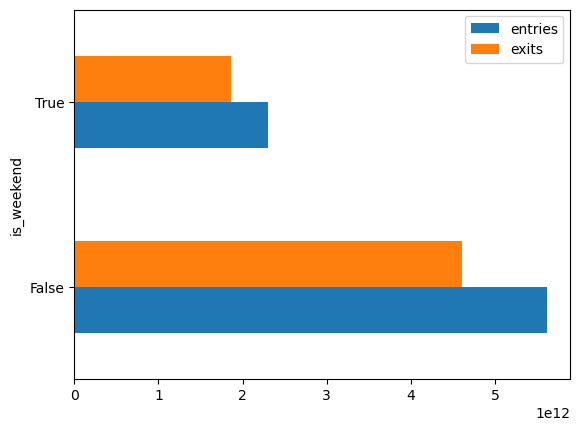

In [139]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = df_1.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

In [140]:
df.columns


Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines', 'day_of_the_week'],
      dtype='object')

Remove the `'c/a'` and `'scp'` columns. 

In [141]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(['c/a','scp'], axis =1)
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_the_week
132292,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
2686,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

**According to my realization, the data plotted is due to the mixture order of the grouped data which to me {is df_1} has been assigned** 

## Summary

You practiced your data cleanup skills using Pandas.